In [1]:
from residualboosting import ResidualBoostingForecaster
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

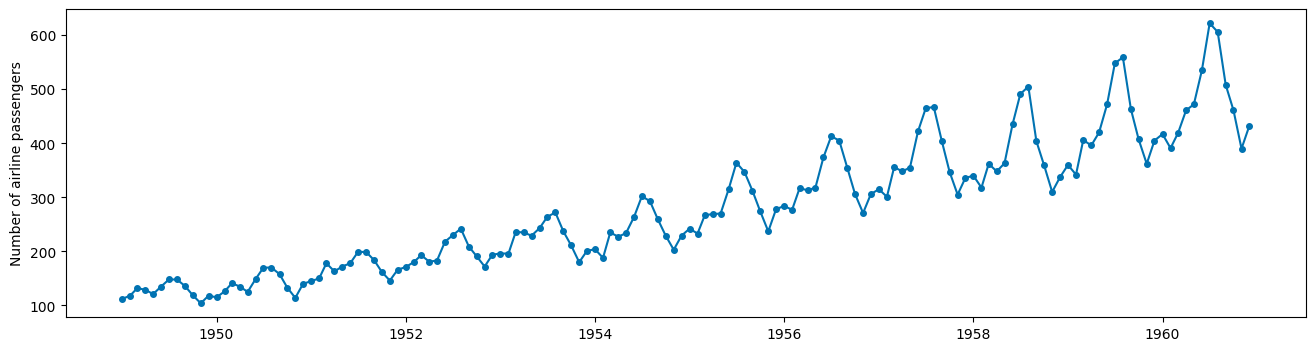

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [3]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y)

In [4]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

simple_exp_smoothing = ExponentialSmoothing(trend="add", seasonal="add", sp=12)
simple_exp_smoothing.fit(y_train)

model = ResidualBoostingForecaster(
    base_forecaster=ExponentialSmoothing(trend="add", seasonal="add", sp=12), num_iter=5
)
model.fit(y_train)

ResidualBoostingForecaster(base_forecaster=ExponentialSmoothing(seasonal='add',
                                                                sp=12,
                                                                trend='add'),
                           num_iter=5)

In [5]:
y_pred_simple = simple_exp_smoothing.predict(y.index)
y_pred = model.predict(y.index)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

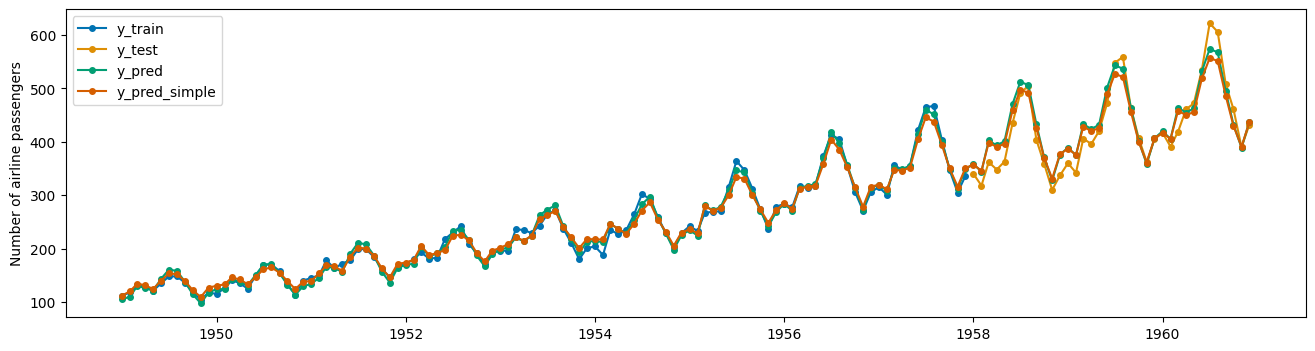

In [6]:
plot_series(y_train, y_test, y_pred, y_pred_simple, labels=["y_train", "y_test", "y_pred", "y_pred_simple"])